# 10. Performance metrics and validation techniques

Evaluating the machine learning algorithm is an essential part of any project. In this chapter we will cover the standard metrics and techniques for evaluation of the given model. Let's start with importing usual ML packages.

In [2]:
import pandas
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score, roc_curve, auc, RocCurveDisplay
np.random.seed(41)

In this example we will be looking at one common dataset which is for type of iris flowers. It has information about 3 types of iris flowers, Iris-setosa, Iris-virginica, Iris-versicolor. It has 4 features which represent dimensions of parts of the flower.

In [3]:
flower_dataset = pandas.read_csv("iris.csv")
flower_dataset.drop('Id', axis=1, inplace=True)

In [4]:
flower_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In order to train a machine learning model, we split the data into a training and testing dataset. The target variable is the 'Species' column, whilst the other 4 columns will be the input to the model.

In [5]:
x = flower_dataset.iloc[:, :-1]
y = flower_dataset.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

## 10.1. Model

The model which are we going to use for training and predicting iris types is **Support Vector Machine**.

In [6]:
model = SVC(random_state=42, probability=True)
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

### 10.1.1. Generating confusion matrix

A confusion matrix is one tool that helps us see how well the model is performing. It is two-dimensional, one axis represents the predicted class and the other axis represents the actual true class. From it we can learn many things and derive the following metrics:
- True positive
- False positive
- True negative
- False negative

These metrics tells us if a data sample was correctly or incorrectly classified in the positive or negative class respectfully. Visually we can better understand how it works.

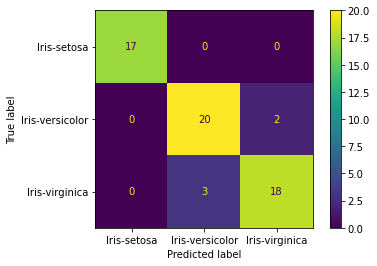

In [7]:
matrix = confusion_matrix(y_test, y_predicted)
display = ConfusionMatrixDisplay(matrix, display_labels=model.classes_)
display.plot()

## 10.2. Metrics


There are a lot of different metrics that one can use to measure how well a machine learning model (classifier) is performing. At first glance they might give similar or same output. But depending on the problem we are dealing with and the data, some metrics are more suitable than others. In the following parts we will explain and show various metrics that one can use when measuring the performance of a machine learning model. It's important to understand the differences between the metrics. When we mention "a positive example" we mean an observation of the data that belongs to the target class we want to predict. For instance, if we have an image classification problem and we need to classify  if the image contains a cat, then those images that do contain a cat are called "positive examples" and those who don't, "negative examples".


## 10.3. Accuracy

The accuracy metric considers all the predictions the model made and it represents the fraction of predictions the model got right. In regards to a binary classification task, accuracy is the fraction of correct predictions **among all predictions**. It's important to understand that, in our situation when we are dealing with the iris dataset, predicting that an iris is of type Iris-setosa while actually the iris type being Iris-Virginica, has an effect on this metric

In [8]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_predicted)

In [9]:
accuracy

0.9166666666666666

### 10.3.1. Cost-sensitive accuracy

Another type of accuracy metric is cost-sensitive accuracy.

There are situations where in our dataset, we have so few target class data samples when compared to another class. For instance, if we want to classify whether a patient has cancer or not, we might have a dataset consisting of only 100 samples with patients that have cancer and 900 samples without. In these situations, we want to tell the algorithm that it's more important to be able to pick out the cancer patients, and that misclassification of them should have a higher penalty. This is due with using cost-sensitive accuracy. We assign weights to our data samples, bigger weights to samples that are important to us and wish to classify. 

In [10]:
model = SVC(random_state=42, probability=True, class_weight='balanced')
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

Here we train the model using cost-sensitive accuracy, by providing an extra parameter "**class_weight**". The value "balanced" automatically assigns weights to the classes inversely proportional to the class frequencies.

## 10.4. Precision

Precision as a metric takes into account only one class at a time. It aims to find how many of our predictions for a certain class are actually correct. In other words, precision is the fraction of correct predictions **among positive <u>predictions</u>**.
In our scenario, we cannot use the precision metric if we want to say how well the model performed on all of the iris type classes, but we may use precision to say how well it performed on each class individually.

In [11]:
precision = precision_score(y_true=y_test, y_pred=y_predicted, average=None)

In [12]:
precision

array([1.        , 0.86956522, 0.9       ])

## 10.5. Recall

Recall same as precision, takes into consideration only one class at a time. We use recall when we want to see how well our model detects the target class. Recall is the fraction of correct predictions **among positive <u>examples</u>**. When we say positive examples, we mean the target class for our problem.

In [13]:
recall = recall_score(y_true=y_test, y_pred=y_predicted, average=None)
recall

array([1.        , 0.90909091, 0.85714286])

## 10.6. ROC curve

A ROC (Receiver Operating Characteristic) curve evaluates the quality of a classifier when the classifier outputs probabilities. For example, instead of the classifier outputing strictly  1 or 0, if the sample belongs to the target class or not, the classifier must predict a certain probability of a sample belonging to the target class. Typically the range or probability goes from 0.0 (0% probability) to 1.0 (100% probability).

When we have probabilities, we define a threshold that states from which probability onward are all predicted samples classified as the target class and the others are not. By changing this threshold value, the number of positives and negatives examples changes. If we set a high threshold, for instance 0.9, we will get a small number of positive examples, but we will be more sure that they are a correct prediction. Likewise, if we set a low threshold, we will be more sure we correctly identified a larger number of positive samples, but a lot of negative samples will be incorectly classified as well.

The ROC curve helps us find the threshold value that will work best for us

Because the ROC metric only deals with maximum two classes (positive and negative class), we will have to remove one of the 3 classes we have in our iris dataset. We will remove the "Iris-setosa" examples and now we are going to find if an example is from the "Iris-versicolor" type.

In [14]:
two_class_dataset = flower_dataset[flower_dataset['Species'] != "Iris-setosa"].copy()
two_class_dataset['Species'] = np.where(two_class_dataset['Species'] == 'Iris-versicolor', 1, 0)

In [15]:
x = two_class_dataset.iloc[:, :-1]
y = two_class_dataset.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

Probabilities for both classes are returned but since they both add up to 1, we can just take the target class we are interested in.

In [16]:
model.fit(x_train, y_train)
y_predicted = model.predict_proba(x_test)[:,1]

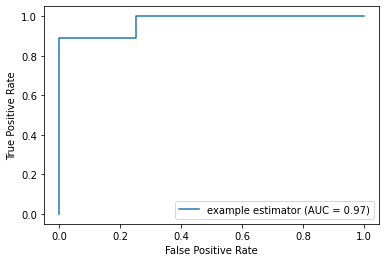

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

## 10.7. Cross validation

In real world use, just training and testing a classifier on a dataset is not enough to guarantee that what we see from the metrics, is what performance we will get. There is a chance that we got lucky when the train/test data split function divided our data. To be more certain of the model's ability to handle new and unseen data, we can validate it repeatedly and choose the time where it performed best. This is called cross validation.

K-fold cross validation breaks down a dataset into **k** several smaller datasets, one for training and the others for validating, k number of times. After training and validation is done, it saves the results of the validation and it does the same again, but now with different data going into the training and validation datasets. This way, all of the data will have had a chance to be part of training and validating.

When we split the dataset into a training and validation dataset, we have to be sure that we will leave some part of our original dataset for testing. This testing data will not be part of the cross validation cycle because after we pick a classifier that performed the best out of the k-iterations, we want to test on to get an unbiased estimate of the final model performance.

In [18]:
scores = cross_val_score(model, x_train, y_train, cv=5)

In [19]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 accuracy with a standard deviation of 0.08


For the previous example, we chose a fold number of 5. What will happen to the score if we increase the number of folds?

In [20]:
scores = cross_val_score(model, x_train, y_train, cv=11)

In [21]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.07
